## Table 1: Linear Probe Analysis

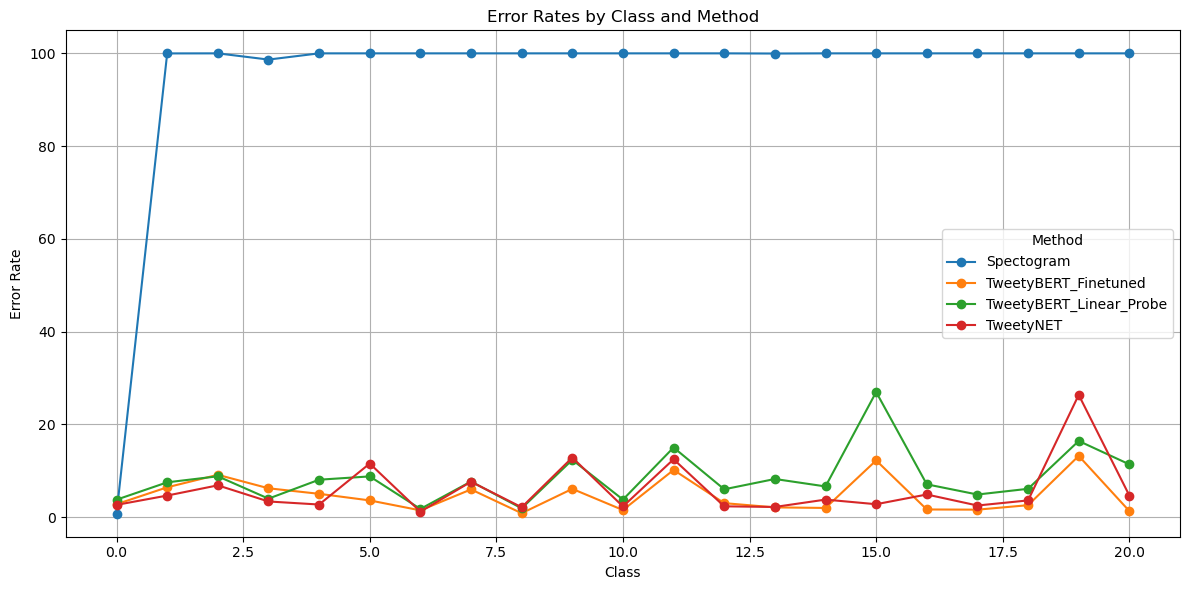

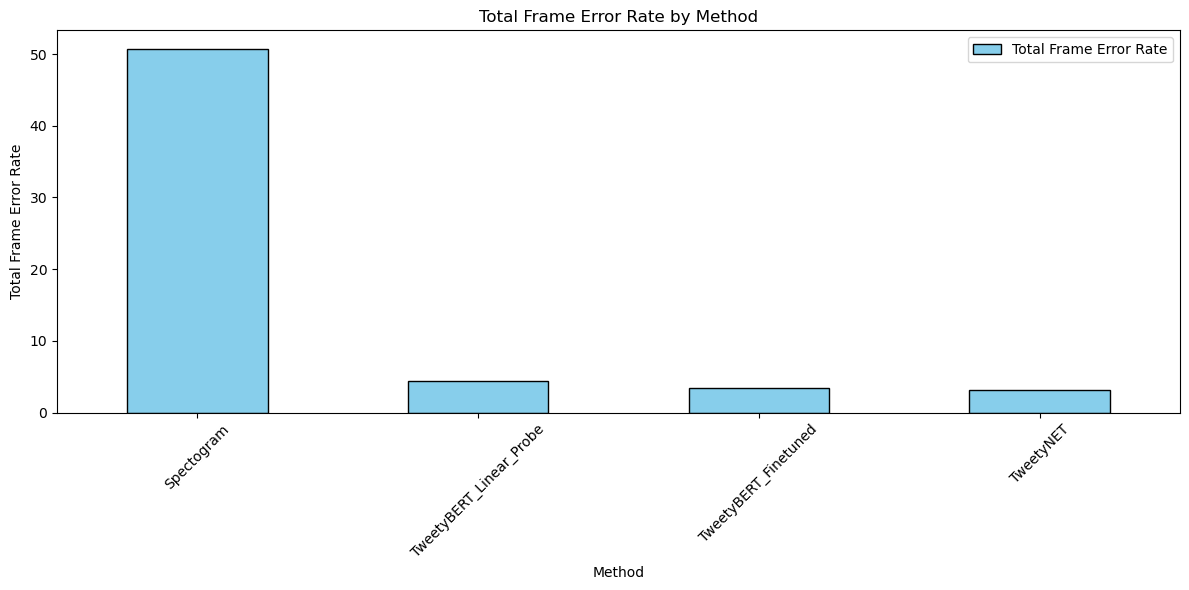

                    Method  Standard Deviation  Total Frame Error Rate
0               Spectogram           21.646187               50.766431
1  TweetyBERT_Linear_Probe            5.727318                4.428799
2     TweetyBERT_Finetuned            3.739185                3.404064
3                TweetyNET            5.848455                3.208441


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the JSON files
files = {
    "Spectogram": "/home/george-vengrovski/Documents/projects/tweety_bert_paper/results/spec_results/results.json",
    "TweetyBERT_Linear_Probe": "/home/george-vengrovski/Documents/projects/tweety_bert_paper/results/tweety_bert_linear/results.json",
    "TweetyBERT_Finetuned": "/home/george-vengrovski/Documents/projects/tweety_bert_paper/results/tweety_bert_finetuned/results.json",
    "TweetyNET": "/home/george-vengrovski/Documents/projects/tweety_bert_paper/results/tweety_net_supervised/class_frame_error_rates.json"
}

def extract_data_from_json(file_path):
    with open(file_path, 'r') as file:
        results = json.load(file)
        total_frame_error_rate = results.get("total_frame_error_rate")
        class_frame_error_rates = results.get("class_frame_error_rates", {})
        return total_frame_error_rate, class_frame_error_rates

# Placeholder for the extracted data
data = []
class_data = []

# Iterate over each file, load the JSON, and extract the required information
for name, path in files.items():
    total_frame_error_rate, class_frame_error_rates = extract_data_from_json(path)
    data.append({
        "Method": name,
        "Total Frame Error Rate": total_frame_error_rate,
    })
    for class_name, error_rate in class_frame_error_rates.items():
        class_data.append({
            "Method": name,
            "Class": class_name,
            "Error Rate": error_rate
        })

# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data)
class_df = pd.DataFrame(class_data)

# Assuming class_df is your DataFrame with all the class data
# Make sure 'Class' is of type int for correct numerical sorting
class_df['Class'] = class_df['Class'].astype(int)

# Sort the DataFrame by 'Class'
class_df_sorted = class_df.sort_values(by='Class')

# Pivot the DataFrame for plotting
pivot_df = class_df_sorted.pivot(index='Class', columns='Method', values='Error Rate')

# Plotting the line plot with classes in correct numerical order
pivot_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Error Rates by Class and Method')
plt.ylabel('Error Rate')
plt.xlabel('Class')
plt.grid(True)
plt.legend(title='Method')
plt.tight_layout()
plt.show()

# Calculate standard deviation for error bars
std_devs = class_df_sorted.groupby('Method')['Error Rate'].std().reindex(df['Method']).reset_index(drop=True)

# Plotting the bar plot with total frame error rates and STD error bars
ax = df.plot(kind='bar', x='Method', y='Total Frame Error Rate', yerr=std_devs, figsize=(12, 6), capsize=4, color='skyblue', edgecolor='black')
plt.title('Total Frame Error Rate by Method')
plt.ylabel('Total Frame Error Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a table with Method, Standard Deviation, and Total Frame Error Rate
table_data = df.copy()
table_data['Standard Deviation'] = std_devs
table_data = table_data[['Method', 'Standard Deviation', 'Total Frame Error Rate']]
print(table_data)



## Table 2: Data-Constrained Finetune